<a href="https://colab.research.google.com/github/kwyvanessa/Datathon_2022/blob/update_datasource/Datathon_2022_Data_Prep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Datathon 2022

## Problem Statement

Preliminary Problem Statement:  What are the three most influential indicators of the gender pay gap 

# Datasets

In [2]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

# Import the numpy and pandas package
import numpy as np
import pandas as pd
import requests
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

from google.colab import drive

## UN Human Development Reports data
https://hdr.undp.org/data-center <br>

[Data Dictionary](https://hdr.undp.org/sites/default/files/2021-22_HDR/HDR21-22_Composite_indices_metadata.xlsx) <br>

This dataset includes time series data for several UN HDC indices and supporting measurements in a single tabular file.  <br>
<br>
Glossary of column prefixes <br>
hdi: Human Development Index<br>
le: life expectancy<br>
gnipc: Gross National Income per capita<br>
mys: Mean years of schooling<br>
eys: Expected Years of Schooling<br>
gdi:  Gender Development Index<br>
gii: Gender inequality index<br>
mmr: Material mortality rate<br>
abr: Adolescent birth rate <br>
se: population with atleast some secondary ed<br>
pr: share of seats in parliament<br>
lfpr: labor force participation rate<br>
phdi: planetary pressures adjusted HDI<br>
co2_prod: Co2 emissions per capita

[This dataset](https://hdr.undp.org/sites/default/files/2021-22_HDR/HDR21-22_Composite_indices_complete_time_series.csv) was transformed using Tableau to pivot the data to have one row per country/year

In [51]:
# Use curl to retrieve transformed csv file from github repo and save in Colab working director
!curl -O "https://raw.githubusercontent.com/kwyvanessa/Datathon_2022/main/hdrDF_by_year_data.csv"

# Read in the csv from the Colab working directory - using a subset of the columns, and parse_dates are enabled to format of the datetime strings. I
hdrDF_y = pd.read_csv("/content/hdrDF_by_year_data.csv",\
                      usecols = ['country','region', 'hdicode','hdi_rank_2021','Year','hdi','le','mys','gnipc','gdi','ihdi','coef ineq','ineq le', 'ineq inc', 'gii','mmr','abr','pr f','lfpr f', 'lfpr m', 'se f', 'se m'],\
                      infer_datetime_format= True)
# Rename columns for consistency of style
hdrDF_y.rename({'coef ineq':'coef_ineq','se m':'se_m','se f':'se_f','pr f':'pr_f','ineq le':'ineq_le','ineq inc':'ineq_inc', 'Year':'date'}, axis =1, inplace = True)

hdrDF_y['date'] = pd.to_datetime(hdrDF_y['date'], format = '%m/%d/%Y') # convert the date column to datetime format
hdrDF_y['year'] = hdrDF_y['date'].dt.year # create a new column for the Year of the observation
hdrDF_y.sample(10)

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 2023k  100 2023k    0     0   928k      0  0:00:02  0:00:02 --:--:--  928k


,hdicode,region,hdi_rank_2021,date,country,hdi,coef_ineq,se_m,se_f,pr_f,...,lfpr f,le,ineq_le,ineq_inc,ihdi,gnipc,gii,gdi,abr,year
3821,Very High,NaN,29.0,2013-01-01,Cyprus,0.861,10.410819,82.666748,77.017517,10.714286,...,56.791,80.4016,2.918637,15.908180,0.770,33007.802480,0.131,0.974,5.364,2013
1193,Very High,EAP,51.0,2013-01-01,Brunei Darussalam,0.838,NaN,69.108000,66.704000,NaN,...,56.311,74.7992,7.052104,NaN,NaN,66079.805080,NaN,0.983,13.550,2013
4789,High,EAP,91.0,2020-01-01,Tonga,0.745,10.478896,93.147922,93.526190,7.407407,...,37.466,70.9276,8.886337,18.240920,0.665,6861.643049,0.366,0.966,19.098,2020
489,High,EAP,80.0,2015-01-01,Palau,0.780,NaN,97.331322,96.889137,10.344828,...,NaN,63.7461,14.737509,NaN,NaN,20005.084430,NaN,NaN,36.109,2015
2371,Low,SSA,178.0,2019-01-01,Liberia,0.484,32.354518,39.160000,20.760000,11.650485,...,72.182,61.1044,31.470604,22.722040,0.325,1338.470653,0.642,0.870,128.605,2019
4879,Medium,EAP,156.0,2016-01-01,Papua New Guinea,0.547,29.253517,14.980000,9.520000,2.702703,...,46.938,64.8399,23.209192,28.899320,0.386,4175.769454,0.576,0.924,59.612,2016
2503,Low,SSA,175.0,2007-01-01,Ethiopia,0.380,NaN,9.881930,4.638360,21.372855,...,74.511,56.4264,NaN,NaN,NaN,1009.775687,0.623,0.821,119.708,2007
5995,Very High,AS,50.0,1990-01-01,Kuwait,0.718,NaN,45.112440,41.945429,0.000000,...,43.837,73.2805,NaN,NaN,NaN,43678.510470,0.591,0.935,27.376,1990
3645,High,LAC,95.0,2020-01-01,Ecuador,0.731,17.819731,52.005791,53.017590,39.416058,...,48.293,72.1535,9.034753,31.050541,0.597,10031.669060,0.366,0.978,63.944,2020
2217,Medium,EAP,140.0,2019-01-01,Vanuatu,0.611,NaN,NaN,NaN,0.000000,...,60.374,69.8769,14.814759,19.682570,NaN,3417.730001,NaN,NaN,65.864,2019


## UN Women Data Hub Wage Data

Data on Average Hourly Wage by gender, country and year was sourced from the [UN Women SDG Indicators Dashboard](https://data.unwomen.org/data-portal).  The Average Hourly Wage data is averaged for all occupations.

In [52]:
# Use curl to get csv file from github repo and save in Colab working directory
!curl -O "https://raw.githubusercontent.com/kwyvanessa/Datathon_2022/main/UNWDH_wages_all.csv"
# Read in the csv from the working directory  - using a subset of the columns.
wages = pd.read_csv("/content/UNWDH_wages_all.csv", usecols = ['REF_AREA Description','TIME_PERIOD','OBS_VALUE','Sex'])
#rename columns
wages.rename({'REF_AREA Description': 'Country', 'TIME_PERIOD': 'Year', 'OBS_VALUE': 'avgHrlyWage'},axis=1, inplace = True) 
#Filter the data
wages = wages.loc[wages['Sex'].isin(['Female','Male'])]
wages.sample(10)

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  629k  100  629k    0     0  1114k      0 --:--:-- --:--:-- --:--:-- 1112k


,Country,Year,avgHrlyWage,Sex
1350,Bolivia (Plurinational State of),2018,20.2,Male
521,Myanmar,2017,845.4,Female
1132,El Salvador,2015,1.8,Female
720,Argentina,2001,3.9,Female
1402,Brazil,2005,4.7,Female
1426,Brazil,2014,10.8,Male
34,Sri Lanka,2018,151.0,Female
1303,Iceland,2014,3110.0,Male
345,Uruguay,2000,43.5,Male
1281,Honduras,2014,45.1,Female


In [53]:
#Pivot the data
wages_wide_mi = wages.pivot(index = ['Country', 'Year'], columns = 'Sex', values = ['avgHrlyWage'])
#drop the multilevel column index
wages_wide_mi.columns = wages_wide_mi.columns.droplevel(0)
#remove the multilevel index
wages_wide = wages_wide_mi.reset_index()
wages_wide.sample(10)

Sex,Country,Year,Female,Male
442,United Kingdom of Great Britain and Northern I...,2017,14.1,17.6
245,Ireland,2010,20.6,23.9
231,Honduras,2015,41.8,32.7
77,Brazil,2015,10.3,11.9
75,Brazil,2013,8.5,9.8
273,Malaysia,2011,9.3,9.3
37,Bolivia (Plurinational State of),2001,5.3,6.6
470,Venezuela (Bolivarian Republic of),2005,3091.0,3257.0
81,Brazil,2019,13.3,15.1
313,Nicaragua,2009,24.0,24.5


In [54]:
# Add a new calculated field for the ratio of Female wages in a given year and country as a percentage of Male wages
wages_wide['wage_ratio'] = wages_wide['Female'] / wages_wide['Male']
wages_wide.sample(10)

Sex,Country,Year,Female,Male,wage_ratio
249,Israel,2015,50.6,59.6,0.848993
108,Costa Rica,2008,1670.0,1774.0,0.941375
282,Mali,2013,401.1,524.4,0.764874
416,Sri Lanka,2013,91.8,99.4,0.923541
194,France,2014,15.9,18.8,0.845745
9,Argentina,2008,10.9,11.2,0.973214
166,El Salvador,2001,11.1,12.3,0.902439
367,Portugal,2010,4.5,4.8,0.937500
10,Argentina,2009,13.0,13.2,0.984848
366,Portugal,2009,4.4,4.9,0.897959


In [55]:
# Drop unneeded columns, rename columns
wages_wide.drop(['Female','Male'], axis =1, inplace = True, errors = 'ignore')
wages_wide.rename({'Country':'country','Year':'year'}, axis = 1, inplace = True)
wages_wide.sample(10)

Sex,country,year,wage_ratio
6,Argentina,2005,1.017241
139,Dominican Republic,2011,0.882212
362,Peru,2014,0.794872
212,Guatemala,2014,1.139706
395,Serbia,2015,0.928642
60,Bosnia and Herzegovina,2017,0.886364
452,Uruguay,2007,0.889752
290,Mauritius,2015,0.835809
43,Bolivia (Plurinational State of),2009,0.878505
282,Mali,2013,0.764874



## Other Datasets

### Original UNHDR Dataset Import

In [ ]:
# Read in the UN HDR data using pandas and preview the DF

#url1 = "https://hdr.undp.org/sites/default/files/2021-22_HDR/HDR21-22_Composite_indices_complete_time_series.csv"

#Use requests package to read csv from url
#r = requests.get(url1)
#open('temp.csv', 'wb').write(r.content)
#hdrDF = pd.read_csv('temp.csv')
#hdrDF.sample(10)

**Dataframe Slicing**
The initial dataframe contains 1008 columns.  This isn't easy to filter since the year is in the column name.

The following two custom functions make it easy to extract a subset of the columns in two ways<br>.  
1: Select all the indicators in the datset for just a single year.  Each indicator is a column<br>
2: Select a single indicator and generate a dataframe with each year as a column

In [ ]:
# Create an arrays of column headers to feed into the custom forumulas
# base_cols are the columns that do not have time series suffixes, or only have a single year's data
#base_cols = ['iso3', 'country', 'hdicode', 'region', 'hdi_rank_2021','rankdiff_hdi_phdi_2021']
#prefixes = ['hdi', 'hdi_f','hdi_m','le','le_f','le_m','gnipc','gni_pc_f','gni_pc_m','mys','mys_m','mys_f','eys','eys_f','eys_m','gdi', 'gii','mmr','abr','se_f','se_m','pr_f','lfpr_f','lfpr_m','phdi','co2_prod' ] # a list of the short names of the columns to be selected from the full dataset


**Slicing by Year**

In [ ]:
# Define a custom function to create a dataframe of indicators for a given year
#def yearslice(base_cols, prefixes, year):
#  year_cols = [x + '_' + year for x in prefixes] # an array of column names for filtering
#  columns = base_cols + year_cols
#  df = hdrDF.loc[:,columns]
#  return df


In [ ]:
# Create a sliced dataframe for a given year using the custom function

#year = '2021'

#hdr_21 = yearslice(base_cols,prefixes,year)
#hdr_21.sample(10)

**Slicing by Indicator**

In [ ]:
# Define a custom function to create a timeseries dataframe for a given indicator
#def ind_slice(indicator, years):
#  ind_cols = [indicator + '_'+ str(x) for x in years]
#  columns = base_cols + ind_cols
#  df = hdrDF.loc[:,columns]
#  return df


In [ ]:
# Create a timeseries DF for a specific indicator (maybe helpful for viz)
#indicator = 'hdi'
#years = range(2010,2022)
#hdi_ts = ind_slice(indicator,years)
#hdi_ts.sample(10)

### World Bank: Women Business and Law data
[Website](https://wbl.worldbank.org/en/wbl-data)<br>
This dataset includes timeseries data for various indices of the interaction between inequality of opportunity for women and labor market dynamics<br>

Timeseries data is available for 1971 to 2022<br>
Measurements are aggregated into the following composite indices<br>
WBL Index (aggregates all)<br>
Mobility<br>
Workplace<br>
PAY<br>
MARRIAGE<br>
PARENTHOOD<br>
ENTREPRENEURSHIP<br>
ASSETS<br>
PENSION

In [ ]:
# Use curl to get csv file from github repo and save in Colab working directory
#!curl -O "https://raw.githubusercontent.com/kwyvanessa/Datathon_2022/main/WBL_1971-2022.csv"
# Read in the csv from the working directory
#wbl_all = pd.read_csv("/content/WBL_1971-2022.csv")
#wbl_all.sample(10)

In [ ]:
# Select only index columns from imported wbl dataset
#wbl = wbl_all.loc[:,['Economy','ISO Code','Region','Report Year','WBL INDEX','MOBILITY','WORKPLACE','PAY','MARRIAGE','PARENTHOOD','ENTREPRENEURSHIP','ASSETS','PENSION']]
#wbl.sample(10)

# Merge Dataframes

In [56]:
# Compare country column from each dataframe
print(wages_wide['country'].nunique())
wages_wide['country'].unique()

102


array(['Albania', 'Argentina', 'Armenia', 'Austria', 'Bangladesh',
       'Belarus', 'Belgium', 'Belize', 'Bolivia (Plurinational State of)',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Cabo Verde',
       'Cambodia', 'Cameroon', 'Chad', 'Chile', 'Colombia', 'Costa Rica',
       'Croatia', 'Curaçao', 'Cyprus', 'Czechia', 'Denmark',
       'Dominican Republic', 'Ecuador', 'El Salvador', 'Estonia',
       'Eswatini', 'Finland', 'France', 'Gambia', 'Germany', 'Ghana',
       'Greece', 'Guatemala', 'Guyana', 'Haiti', 'Honduras', 'Hungary',
       'Iceland', 'Indonesia', 'Ireland', 'Israel', 'Italy', 'Jamaica',
       'Jordan', "Lao People's Democratic Republic", 'Latvia', 'Lebanon',
       'Lithuania', 'Luxembourg', 'Madagascar', 'Malawi', 'Malaysia',
       'Maldives', 'Mali', 'Malta', 'Mauritius', 'Mexico', 'Mongolia',
       'Montenegro', 'Myanmar', 'Nepal', 'Netherlands', 'Nicaragua',
       'North Macedonia', 'Norway'

In [57]:
print(hdrDF_y['country'].nunique())
hdrDF_y['country'].sort_values().unique()

206


array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Arab States', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bhutan', 'Bolivia (Plurinational State of)',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo', 'Congo (Democratic Republic of the)',
       'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czechia',
       "Côte d'Ivoire", 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'East Asia and the Pacific', 'Ecuador',
       'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini (Kingdom of)', 'Ethiopia', 'Europe and Central Asia',
       'Fiji', 'Finland

In [58]:
# Rename country values to make consistent between the two datasets
wages_wide.loc[wages_wide['country'] == 'Republic of Korea'] = 'Korea (Republic of)' # Korea
wages_wide.loc[wages_wide['country'] == 'United Kingdom of Great Britain and Northern Ireland'] = 'United Kingdom' # United Kingdom
hdrDF_y.loc[hdrDF_y['country'] == 'Eswatini (Kingdom of)'] = 'Eswatini' #Eswatini

In [59]:
# Merge datasets
paygap = pd.merge(hdrDF_y, wages_wide, how = 'inner', on = ['country','year'])
paygap.sample(10)

,hdicode,region,hdi_rank_2021,date,country,hdi,coef_ineq,se_m,se_f,pr_f,...,le,ineq_le,ineq_inc,ihdi,gnipc,gii,gdi,abr,year,wage_ratio
202,High,LAC,80.0,2005-01-01 00:00:00,Dominican Republic,0.674,NaN,37.432733,38.928204,15.384615,...,70.8752,NaN,NaN,NaN,9742.487438,0.494,0.955,103.28,2005,0.94964
200,Very High,LAC,42.0,2011-01-01 00:00:00,Chile,0.817,17.161314,74.850533,71.15097,13.924051,...,79.1099,6.361426,30.182054,0.672,20732.94409,0.327,0.961,52.145,2011,0.838509
13,Very High,LAC,58.0,2018-01-01 00:00:00,Uruguay,0.819,11.988036,54.579208,58.83083,22.307692,...,77.611,5.892226,23.545822,0.717,21730.72567,0.258,1.019,42.587,2018,0.988172
193,Medium,LAC,118.0,2018-01-01 00:00:00,Bolivia (Plurinational State of),0.714,22.008886,66.502592,56.832369,51.807229,...,67.748,19.32531,29.133537,0.555,8443.883853,0.419,0.954,66.461,2018,0.965347
153,Very High,NaN,33.0,2018-01-01 00:00:00,Greece,0.886,10.682098,73.066788,65.683701,18.666667,...,81.3907,3.531683,17.44667,0.789,28566.21672,0.127,0.969,8.245,2018,0.888889
266,Very High,LAC,58.0,2006-01-01 00:00:00,Uruguay,0.768,NaN,45.561642,48.495602,10.769231,...,76.3615,NaN,NaN,NaN,14884.97098,0.359,1.007,67.703,2006,0.882852
241,High,LAC,105.0,2001-01-01 00:00:00,Paraguay,0.655,NaN,34.832036,32.196925,8.0,...,69.8997,NaN,NaN,NaN,7372.0369,0.549,0.954,77.586,2001,0.910114
371,High,LAC,95.0,2019-01-01 00:00:00,Ecuador,0.76,17.93478,52.426384,52.84007,37.956204,...,77.2971,9.379899,31.050541,0.619,11034.20422,0.37,0.969,67.77,2019,1.103448
443,Very High,LAC,58.0,2014-01-01 00:00:00,Uruguay,0.808,12.800891,51.581841,54.96661,11.538462,...,77.3663,7.259492,24.294552,0.702,21004.10273,0.328,1.018,59.981,2014,0.949306
429,Very High,NaN,32.0,2012-01-01 00:00:00,Czechia,0.874,5.254216,99.752907,99.876343,20.640569,...,78.0058,3.393329,10.97887,0.827,30967.18755,0.142,0.979,12.554,2012,0.787183


In [60]:
# Create a Datetime Index from the date field
paygap.set_index('date', drop = True, inplace = True) 
paygap.sample(10)

,hdicode,region,hdi_rank_2021,country,hdi,coef_ineq,se_m,se_f,pr_f,mys,...,le,ineq_le,ineq_inc,ihdi,gnipc,gii,gdi,abr,year,wage_ratio
date,,,,,,,,,,,,,,,,,,,,,
2005-01-01,High,LAC,84.0,Peru,0.686,NaN,54.74044,45.906528,18.333333,7.92441,...,72.9858,NaN,NaN,NaN,7094.575199,0.462,0.936,68.491,2005,0.846154
2017-01-01,High,LAC,95.0,Ecuador,0.762,17.816623,53.26757,52.485031,37.956204,8.76592,...,76.9725,9.787413,29.896735,0.623,11346.37257,0.376,0.965,72.683,2017,1.071429
2019-01-01,High,EAP,114.0,Indonesia,0.716,17.122578,56.633425,48.923719,17.391304,8.359275,...,70.5184,14.000448,20.11727,0.593,11453.54855,0.457,0.939,34.867,2019,0.867276
2010-01-01,Very High,NaN,13.0,Belgium,0.912,7.845512,82.38205,77.085838,38.914027,11.41578,...,80.033,3.981316,11.92822,0.84,48513.05855,0.092,0.971,10.265,2010,0.89899
2013-01-01,Very High,NaN,11.0,Finland,0.926,5.160772,83.457535,88.367546,42.5,12.54921,...,80.8831,2.886857,10.56616,0.877,44871.50214,0.061,0.989,7.475,2013,0.826291
2018-01-01,Very High,LAC,58.0,Uruguay,0.819,11.988036,54.579208,58.83083,22.307692,8.90673,...,77.611,5.892226,23.545822,0.717,21730.72567,0.258,1.019,42.587,2018,0.988172
2014-01-01,Very High,LAC,47.0,Argentina,0.846,13.745554,67.674676,67.233668,37.082067,10.90851,...,76.7549,8.654256,26.390125,0.725,23087.86964,0.351,0.995,67.791,2014,1.036199
2019-01-01,Very High,SSA,63.0,Mauritius,0.817,16.575786,70.773249,64.414979,20.0,10.42791,...,75.1179,9.633392,18.180982,0.681,25589.34366,0.344,0.969,24.31,2019,0.87963
2017-01-01,Very High,NaN,38.0,Portugal,0.859,12.349717,56.1134,54.38361,34.782609,9.21823,...,81.498,3.214552,18.05881,0.751,32269.04155,0.077,0.987,7.847,2017,0.90566


# Exploratory Data Analysis

## Shapes, Sizes, and Info

In [61]:
# rows and columns of dataframe
paygap_sh = paygap.shape    # number of instances (rows) and features (cols)
paygap_sz = paygap.size     # the number of elements
paygap_col = paygap.columns # to know just the names of the columns or features

print(f"paygap dataframe: \n\n\
 shape (rows|cols): {paygap_sh}\n \
size: {paygap_sz}\n\n \
Features|Columns\n{paygap_col}")

paygap dataframe: 

 shape (rows|cols): (466, 23)
 size: 10718

 Features|Columns
Index(['hdicode', 'region', 'hdi_rank_2021', 'country', 'hdi', 'coef_ineq',
       'se_m', 'se_f', 'pr_f', 'mys', 'mmr', 'lfpr m', 'lfpr f', 'le',
       'ineq_le', 'ineq_inc', 'ihdi', 'gnipc', 'gii', 'gdi', 'abr', 'year',
       'wage_ratio'],
      dtype='object')


In [62]:
# Displays the concise summary of dataframe
paygap.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 466 entries, 2018-01-01 to 2017-01-01
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   hdicode        466 non-null    object
 1   region         354 non-null    object
 2   hdi_rank_2021  466 non-null    object
 3   country        466 non-null    object
 4   hdi            466 non-null    object
 5   coef_ineq      303 non-null    object
 6   se_m           466 non-null    object
 7   se_f           466 non-null    object
 8   pr_f           465 non-null    object
 9   mys            466 non-null    object
 10  mmr            466 non-null    object
 11  lfpr m         466 non-null    object
 12  lfpr f         466 non-null    object
 13  le             466 non-null    object
 14  ineq_le        336 non-null    object
 15  ineq_inc       312 non-null    object
 16  ihdi           303 non-null    object
 17  gnipc          466 non-null    object
 18  gii        

## Total count of null values for all the attributes

In [63]:
print("Columns with missing values: ")
print(paygap.columns[paygap.isnull().any()].tolist())

Columns with missing values: 
['region', 'coef_ineq', 'pr_f', 'ineq_le', 'ineq_inc', 'ihdi', 'gii', 'gdi']


In [64]:
# to know just the missing values
print(paygap.isnull().sum())

hdicode            0
region           112
hdi_rank_2021      0
country            0
hdi                0
coef_ineq        163
se_m               0
se_f               0
pr_f               1
mys                0
mmr                0
lfpr m             0
lfpr f             0
le                 0
ineq_le          130
ineq_inc         154
ihdi             163
gnipc              0
gii                1
gdi               11
abr                0
year               0
wage_ratio         0
dtype: int64


In [65]:
print(paygap.columns[paygap.notnull().any()].tolist())

['hdicode', 'region', 'hdi_rank_2021', 'country', 'hdi', 'coef_ineq', 'se_m', 'se_f', 'pr_f', 'mys', 'mmr', 'lfpr m', 'lfpr f', 'le', 'ineq_le', 'ineq_inc', 'ihdi', 'gnipc', 'gii', 'gdi', 'abr', 'year', 'wage_ratio']


In [66]:
# to know just the non null values
total_nn = paygap.count() - paygap.isnull().sum()
print(total_nn)

hdicode          466
region           242
hdi_rank_2021    466
country          466
hdi              466
coef_ineq        140
se_m             466
se_f             466
pr_f             464
mys              466
mmr              466
lfpr m           466
lfpr f           466
le               466
ineq_le          206
ineq_inc         158
ihdi             140
gnipc            466
gii              464
gdi              444
abr              466
year             466
wage_ratio       466
dtype: int64


##Summary statistics of the categorical features

In [67]:
paygap.describe(include='object')

,hdicode,region,hdi_rank_2021,country,hdi,coef_ineq,se_m,se_f,pr_f,mys,...,le,ineq_le,ineq_inc,ihdi,gnipc,gii,gdi,abr,year,wage_ratio
count,466,354,466.0,466,466.000,303.000000,466.0,466.0,465.000000,466.00000,...,466.0000,336.000000,312.000000,303.000,466.00000,465.000,455.000,466.000,466,466.0
unique,4,6,93.0,98,281.000,303.000000,463.0,464.0,248.000000,466.00000,...,466.0000,336.000000,266.000000,230.000,466.00000,298.000,133.000,466.000,20,411.0
top,Very High,LAC,58.0,Uruguay,0.732,23.057323,100.0,100.0,19.298246,10.55221,...,75.6444,6.079516,18.180982,0.619,26720.61992,0.424,0.989,9.536,2014,1.0
freq,205,248,35.0,20,6.000,1.000000,4.0,3.0,11.000000,1.00000,...,1.0000,1.000000,8.000000,4.000,1.00000,6.000,17.000,1.000,58,18.0


In [68]:
# For the dataframe group numeric features by each categorical feature 
# Displays categorical features noted above that have unique (2nd row) features < 100
for column in paygap.select_dtypes(include='object'):
    if paygap[column].nunique() < 100:
        display(paygap.groupby(column).mean())
     

,hdi_rank_2021,hdi,coef_ineq,se_m,se_f,pr_f,mys,mmr,lfpr m,lfpr f,le,ineq_le,ineq_inc,ihdi,gnipc,gii,gdi,abr,year,wage_ratio
hdicode,,,,,,,,,,,,,,,,,,,,
High,90.918919,0.723912,17.908825,59.984475,56.497046,18.685543,8.360739,72.229730,75.310020,50.200764,73.681330,10.933429,27.460042,0.605843,11276.968493,0.405973,0.966165,60.760541,2011.560811,0.914677
Low,169.062500,0.492437,30.039715,30.316660,16.851426,20.451785,4.090415,415.187500,74.203063,54.981250,61.117956,30.130393,22.867904,0.345429,2409.031816,0.578688,0.838800,95.184875,2014.375000,0.767170
Medium,129.721649,0.632670,25.099693,40.062714,34.684014,19.958914,6.319224,135.134021,80.085351,49.853433,69.393308,17.239348,31.831803,0.477260,6871.894417,0.487639,0.946948,82.290763,2010.329897,0.993945
Very High,39.243902,0.846815,10.638534,75.289067,73.392351,25.579047,10.647016,20.502439,69.843785,51.364849,78.537182,5.006987,19.076226,0.773527,31203.317357,0.212544,0.984390,29.170868,2012.848780,0.897731


,hdi_rank_2021,hdi,coef_ineq,se_m,se_f,pr_f,mys,mmr,lfpr m,lfpr f,le,ineq_le,ineq_inc,ihdi,gnipc,gii,gdi,abr,year,wage_ratio
region,,,,,,,,,,,,,,,,,,,,
AS,104.500000,0.728250,14.450390,76.789690,71.656644,12.710337,9.931514,41.750000,64.106250,16.954500,76.639000,8.905803,17.911850,0.617667,11092.861615,0.443500,0.892750,25.682250,2018.250000,1.162408
EAP,102.969697,0.707364,19.610009,64.753719,58.625768,18.583996,8.409085,86.000000,76.074848,57.641000,72.244491,13.145941,20.482429,0.539687,14280.462148,0.353344,0.974182,30.520121,2015.121212,0.958289
ECA,71.678571,0.777536,11.853381,88.773263,78.366272,22.545206,10.232040,14.392857,61.117107,41.374429,76.081204,5.616375,19.283906,0.685148,14127.679880,0.195857,0.960214,16.359143,2015.642857,0.888236
LAC,93.104839,0.710274,20.509616,48.079033,46.190863,20.417169,7.627976,84.495968,78.409073,49.983004,73.139718,12.130061,32.259984,0.580385,11923.823217,0.440500,0.967443,76.664077,2009.310484,0.955782
SA,106.916667,0.681667,21.973183,60.791842,54.957743,12.467981,7.999033,87.750000,76.063500,36.104500,72.460725,13.997224,18.995821,0.513889,8986.628260,0.440417,0.902167,33.406750,2016.166667,0.898631
SSA,128.206897,0.617552,25.928983,49.218803,38.084056,20.201570,6.715095,292.448276,73.571517,57.316793,65.706717,22.176367,26.529356,0.459560,9365.311830,0.498310,0.913483,78.628931,2015.310345,0.798471


,hdi,coef_ineq,se_m,se_f,pr_f,mys,mmr,lfpr m,lfpr f,le,ineq_le,ineq_inc,ihdi,gnipc,gii,gdi,abr,year,wage_ratio
hdi_rank_2021,,,,,,,,,,,,,,,,,,,
1.0,0.9555,6.360337,97.567307,96.561054,29.065041,13.719900,5.0,74.1820,62.3980,83.32320,3.491925,13.485430,0.8935,68395.457870,0.0370,0.9675,2.7320,2016.0,0.824399
2.0,0.9570,5.544108,99.320202,99.105824,40.532544,12.844827,2.5,66.6255,62.3375,82.42320,2.844720,11.320785,0.9025,68888.986260,0.0310,0.9935,3.8145,2016.0,0.862463
3.0,0.9488,5.126354,98.631404,98.480712,40.952381,13.255520,4.2,80.8332,72.3612,82.45992,2.594673,10.195156,0.8996,51723.690740,0.0590,0.9772,6.8272,2016.0,0.816199
6.0,0.9370,6.531351,92.658348,92.636177,38.268156,12.624150,4.0,65.8940,57.2890,80.81010,3.682917,12.174925,0.8750,55773.717885,0.0285,0.9780,3.1645,2016.0,0.846657
7.0,0.9388,6.617207,90.839625,90.226154,44.297994,12.419297,4.2,67.5434,60.7974,82.34332,2.858446,13.338526,0.8756,51903.112890,0.0374,0.9878,4.6102,2016.0,0.879688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173.0,0.5040,27.439097,30.422803,26.860513,20.529801,4.935426,363.0,89.2200,83.5990,64.33900,26.864531,20.438280,0.3640,1494.630382,0.5590,0.9550,130.2380,2015.0,0.926953
174.0,0.4670,NaN,35.852348,19.082861,7.547170,3.435686,650.0,68.1780,50.1170,62.09610,28.792980,26.928000,NaN,2092.378476,0.6530,0.8140,91.5970,2012.0,0.578431
184.0,0.4490,29.961907,15.741910,9.934090,11.023622,1.919520,320.0,73.4340,57.7820,60.04660,33.421192,17.311735,0.3120,2050.921164,0.5980,0.8840,115.1660,2018.0,0.761029


,hdi_rank_2021,hdi,coef_ineq,se_m,se_f,pr_f,mys,mmr,lfpr m,lfpr f,le,ineq_le,ineq_inc,ihdi,gnipc,gii,gdi,abr,year,wage_ratio
country,,,,,,,,,,,,,,,,,,,,
Albania,67.0,0.806000,10.554499,92.903100,94.975638,27.857143,11.096983,15.000000,67.247000,51.189000,79.183800,6.151076,13.178980,0.720000,13302.705960,0.164000,0.997000,15.580000,2018.0000,0.930693
Argentina,47.0,0.817688,14.121856,59.890257,59.597865,34.821791,10.219403,54.750000,73.907813,48.814688,75.447894,8.933991,26.959373,0.719667,20253.786434,0.370375,0.993062,64.798000,2007.6875,0.985537
Armenia,85.0,0.768667,9.301325,97.320207,96.389146,15.289399,11.355898,26.500000,66.023000,46.685167,74.761117,8.341976,16.377033,0.695833,12364.387790,0.281333,0.987833,22.742667,2016.5000,0.803187
Austria,25.0,0.909333,6.555226,99.236799,95.457353,31.514442,11.979095,5.000000,66.870333,55.118667,81.180267,3.559078,13.418627,0.848333,53282.154527,0.085000,0.967333,8.078667,2014.0000,0.780201
Bangladesh,129.0,0.622000,23.575913,46.800072,38.460880,20.285714,6.270250,173.000000,80.135000,36.109000,71.787900,17.762270,15.656920,0.471000,4339.489843,0.534000,0.902000,78.290000,2017.0000,1.070085
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Uruguay,58.0,0.787750,12.868476,51.615386,54.639775,14.244186,8.541791,19.750000,73.400800,53.732250,76.670620,6.950790,24.657515,0.700200,17679.090164,0.330950,1.013550,61.744850,2009.5000,0.920348
Venezuela (Bolivarian Republic of),120.0,0.703571,NaN,40.320310,43.170379,12.217723,7.104344,121.428571,79.328286,48.054429,72.331329,NaN,NaN,NaN,15838.480000,0.515714,0.982571,93.448429,2003.0000,0.981224
Viet Nam,115.0,0.681800,17.552416,70.365725,60.435123,25.443762,7.990619,45.000000,81.200600,71.640500,73.837100,13.813202,21.558357,0.563778,6020.846143,0.312200,1.000100,35.153800,2014.4000,0.928866


,hdi_rank_2021,hdi,coef_ineq,se_m,se_f,pr_f,mys,mmr,lfpr m,lfpr f,le,ineq_le,ineq_inc,ihdi,gnipc,gii,gdi,abr,wage_ratio
year,,,,,,,,,,,,,,,,,,,
2000,84.909091,0.690364,NaN,45.023011,41.609390,12.511748,7.181865,103.363636,78.694000,45.896727,72.139527,NaN,NaN,NaN,11970.747864,0.487455,0.948000,84.117818,0.889713
2001,99.133333,0.659467,NaN,40.060684,37.918152,12.054868,6.716829,129.866667,78.844467,49.692400,70.211880,NaN,NaN,NaN,9224.994766,0.500600,0.959583,86.194067,0.923962
2002,100.000000,0.671769,NaN,40.945713,38.625812,13.083960,6.822095,108.384615,79.132154,49.305308,70.994654,NaN,NaN,NaN,9593.053910,0.492154,0.953077,83.716615,0.934669
2003,93.583333,0.683833,NaN,43.302869,41.552714,12.504801,7.111056,88.166667,79.124667,48.421333,72.267158,NaN,NaN,NaN,9763.859469,0.480167,0.957909,80.596750,0.923732
2004,94.916667,0.685250,NaN,41.426464,39.660778,14.851526,7.000834,86.083333,79.876583,49.656917,72.688375,NaN,NaN,NaN,9943.375856,0.473333,0.960909,80.958583,0.933620
2005,94.857143,0.686071,NaN,42.971671,40.802379,17.809440,7.124560,96.714286,79.518857,50.110429,72.087357,NaN,NaN,NaN,9865.123337,0.466214,0.963308,82.955000,0.946595
2006,94.846154,0.693385,NaN,44.039677,41.473874,17.793856,7.130136,95.384615,79.248308,49.904692,72.328254,NaN,NaN,NaN,10944.638159,0.461769,0.957667,79.845846,0.927371
2007,88.545455,0.706909,NaN,43.672600,41.268470,20.637718,7.310659,86.181818,78.362364,52.158000,72.745973,NaN,NaN,NaN,12403.294763,0.423273,0.967600,73.585364,0.903044
2008,86.000000,0.719615,NaN,46.352886,43.919961,22.183904,7.561929,76.615385,78.191769,51.194308,73.526985,NaN,NaN,NaN,13492.862730,0.412154,0.965750,72.895077,0.891022


## Visualizing the missing values

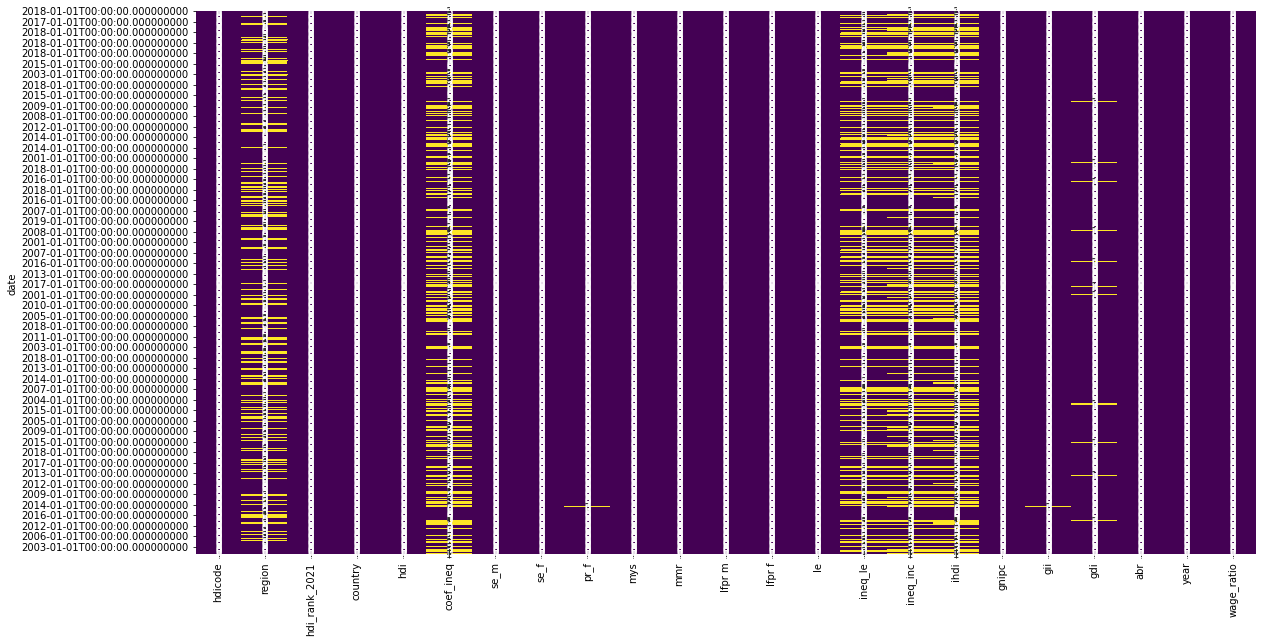

In [69]:
plt.figure(figsize=(19, 10))

# setting the parameter values
sns.heatmap(paygap.isnull(),cbar=False,cmap='viridis', annot = True)

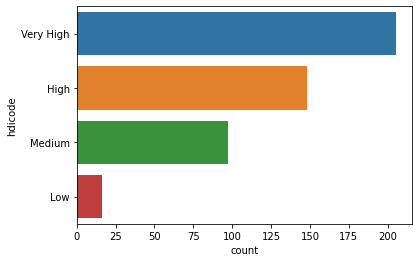

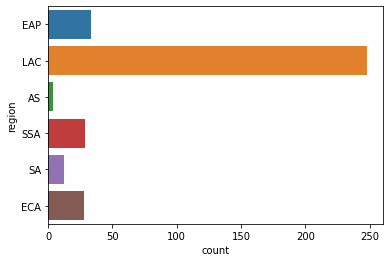

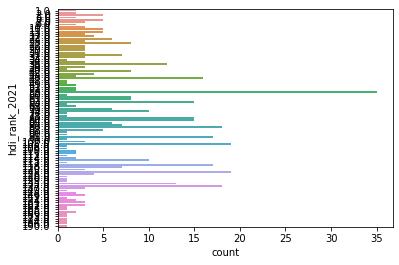

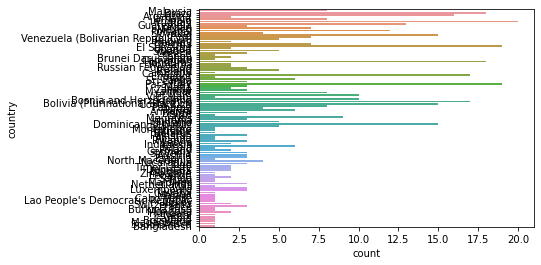

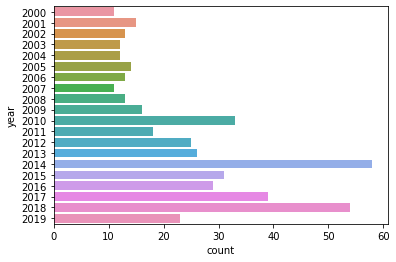

In [33]:
# Plot of each categorical features < 100
for column in paygap.select_dtypes(include='object'):
    if paygap[column].nunique() < 100:
        sns.countplot(y=column, data=paygap)
        plt.show()

In [79]:
# Fill in missing regions 
region_uniq = paygap["region"].sort_values().unique()
print(f"paygap region : {region_uniq}")

paygap["region"].fillna("No Region", inplace = True)
paygap["region"].sort_values().unique()

paygap region : ['AS' 'EAP' 'ECA' 'LAC' 'SA' 'SSA' nan]


array(['AS', 'EAP', 'ECA', 'LAC', 'No Region', 'SA', 'SSA'], dtype=object)

In [80]:
# Fill in the missing remaining values
paygap["coef_ineq"].fillna(0, inplace = True)
paygap["ineq_le"].fillna(0, inplace = True)
paygap["ineq_inc"].fillna(0, inplace = True)
paygap["ihdi"].fillna(0, inplace = True)
paygap["gdi"].fillna(0, inplace = True)
paygap["gii"].fillna(0, inplace = True)
paygap["pr_f"].fillna(0, inplace = True)

In [83]:
# to know just the missing values
print(paygap.isnull().sum())

hdicode          0
region           0
hdi_rank_2021    0
country          0
hdi              0
coef_ineq        0
se_m             0
se_f             0
pr_f             0
mys              0
mmr              0
lfpr m           0
lfpr f           0
le               0
ineq_le          0
ineq_inc         0
ihdi             0
gnipc            0
gii              0
gdi              0
abr              0
year             0
wage_ratio       0
dtype: int64


# Data Preparation